In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PowerTransformer

df=pd.read_csv("Customer_Data.csv")
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [2]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

# Remove irrelevant columns
- We remove **CUST_ID** because it’s just a unique number for each customer and doesn’t help in finding patterns or groups.

In [3]:
df=df.drop(columns=['CUST_ID'],axis=1)

In [4]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# Handel missing values
- We use the median to impute missing values because it is not affected by extreme values (outliers), making it a reliable choice for datasets with skewed distributions of CREDIT_LIMIT,MINIMUM_PAYMENTS

In [5]:
imputer = SimpleImputer(strategy ='median')
data_imputed = pd.DataFrame(imputer.fit_transform(df),columns=df.columns)

In [6]:
data_imputed.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [7]:
# 1. Create new features
data_imputed['TOTAL_PURCHASES_TYPE'] = data_imputed['ONEOFF_PURCHASES'] + data_imputed['INSTALLMENTS_PURCHASES']
data_imputed['CREDIT_UTILIZATION_RATIO'] = data_imputed['PURCHASES'] / data_imputed['CREDIT_LIMIT']


In [8]:
data_imputed.head(3)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,TOTAL_PURCHASES_TYPE,CREDIT_UTILIZATION_RATIO
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.0,0.083333,0.00,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0,95.40,0.095400
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0,0.00,0.000000
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.0,0.000000,0.00,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0,773.17,0.103089


# Apply transformation 
- we can decided to apply Yes, Yeo-Johnson Transformation is a great choice for your dataset because it is versatile and works for:

- Positive, zero, and negative values.
- Highly skewed features.
- Both left-skewed and right-skewed distributions.
It automatically adjusts the skewness and transforms each feature towards a more Gaussian-like distribution, which is beneficial for clustering tasks like customer segmentation.

In [9]:
# Identify numerical columns for transformation
features_to_transform = [
    'BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
    'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS',
    'BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
    'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
    'PRC_FULL_PAYMENT', 'TENURE'
]

In [10]:
# Initialize the PowerTransformer
power_transformer = PowerTransformer(method='yeo-johnson')

# Apply transformation to the selected features
transformed_data = data_imputed.copy()
transformed_data[features_to_transform] = power_transformer.fit_transform(data_imputed[features_to_transform])


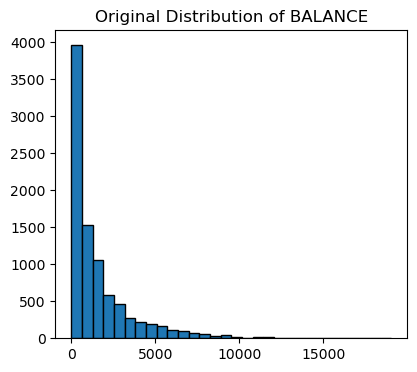

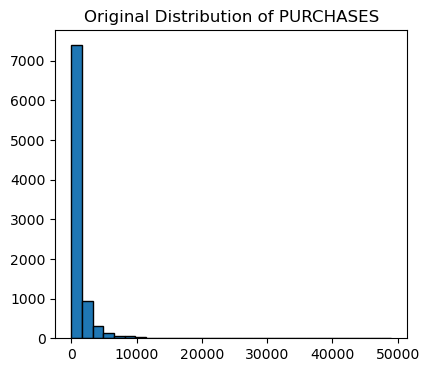

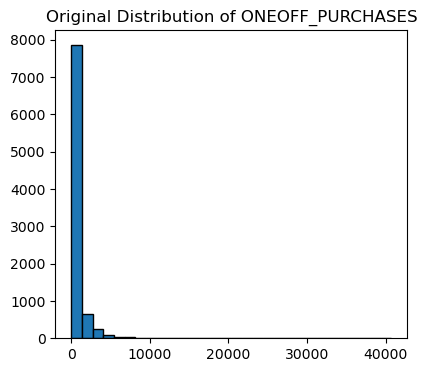

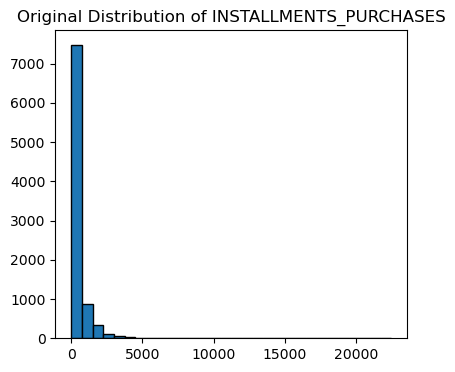

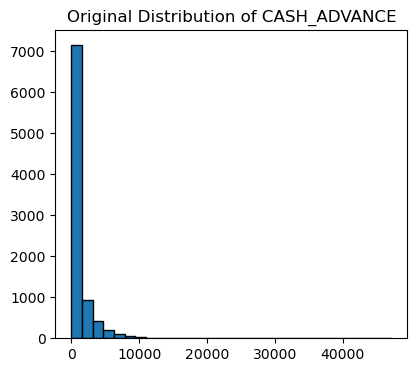

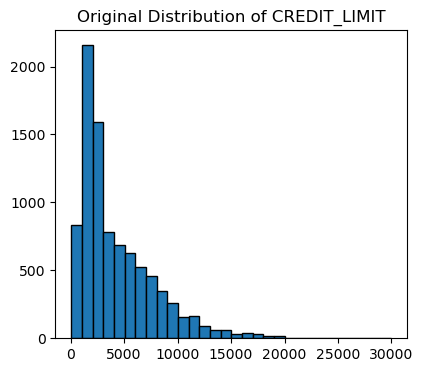

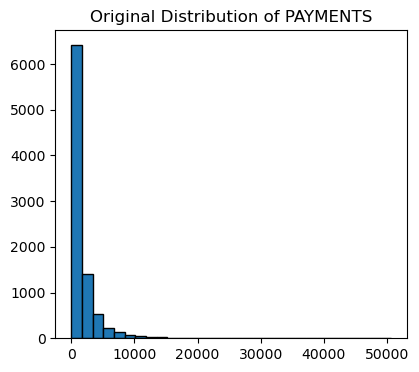

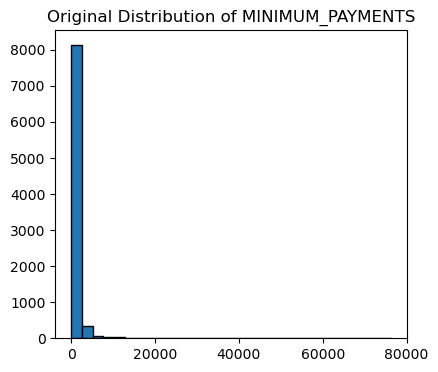

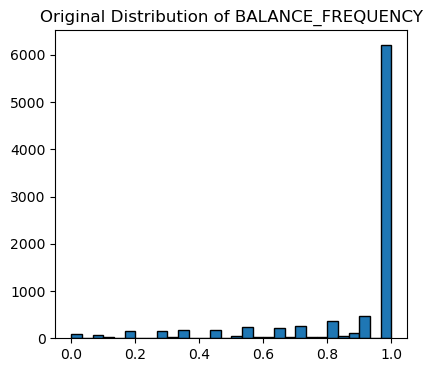

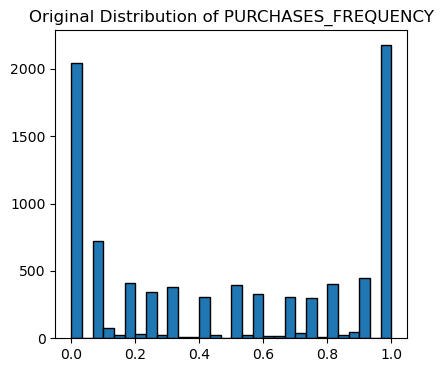

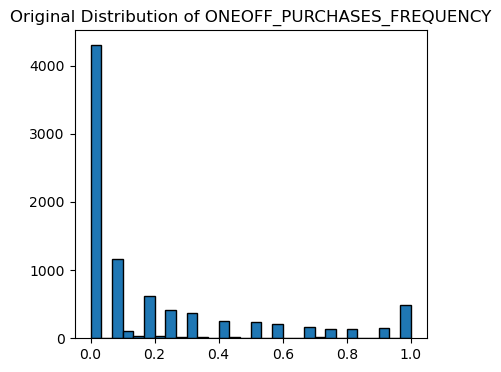

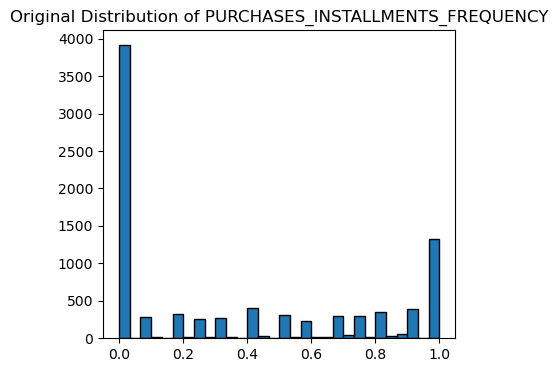

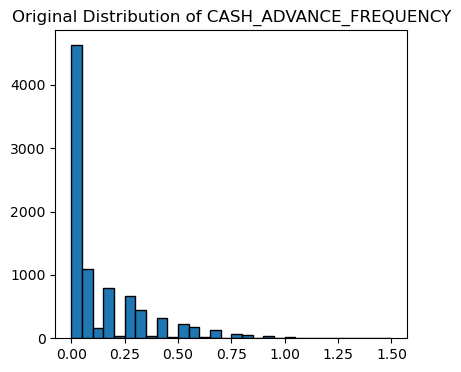

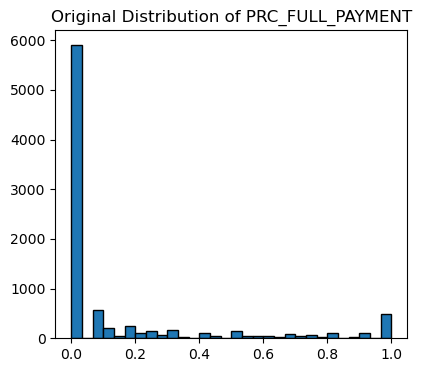

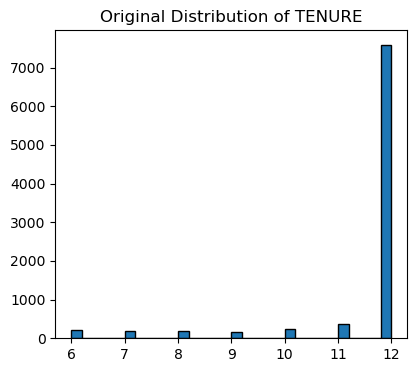

In [11]:
# Plot original vs transformed distributions for a few features
for col in features_to_transform[:19]:  # Plot the first 4 features as an example
    plt.figure(figsize=(10, 4))
    
    # Original
    plt.subplot(1, 2, 1)
    plt.hist(df[col], bins=30, edgecolor='k')
    plt.title(f"Original Distribution of {col}")

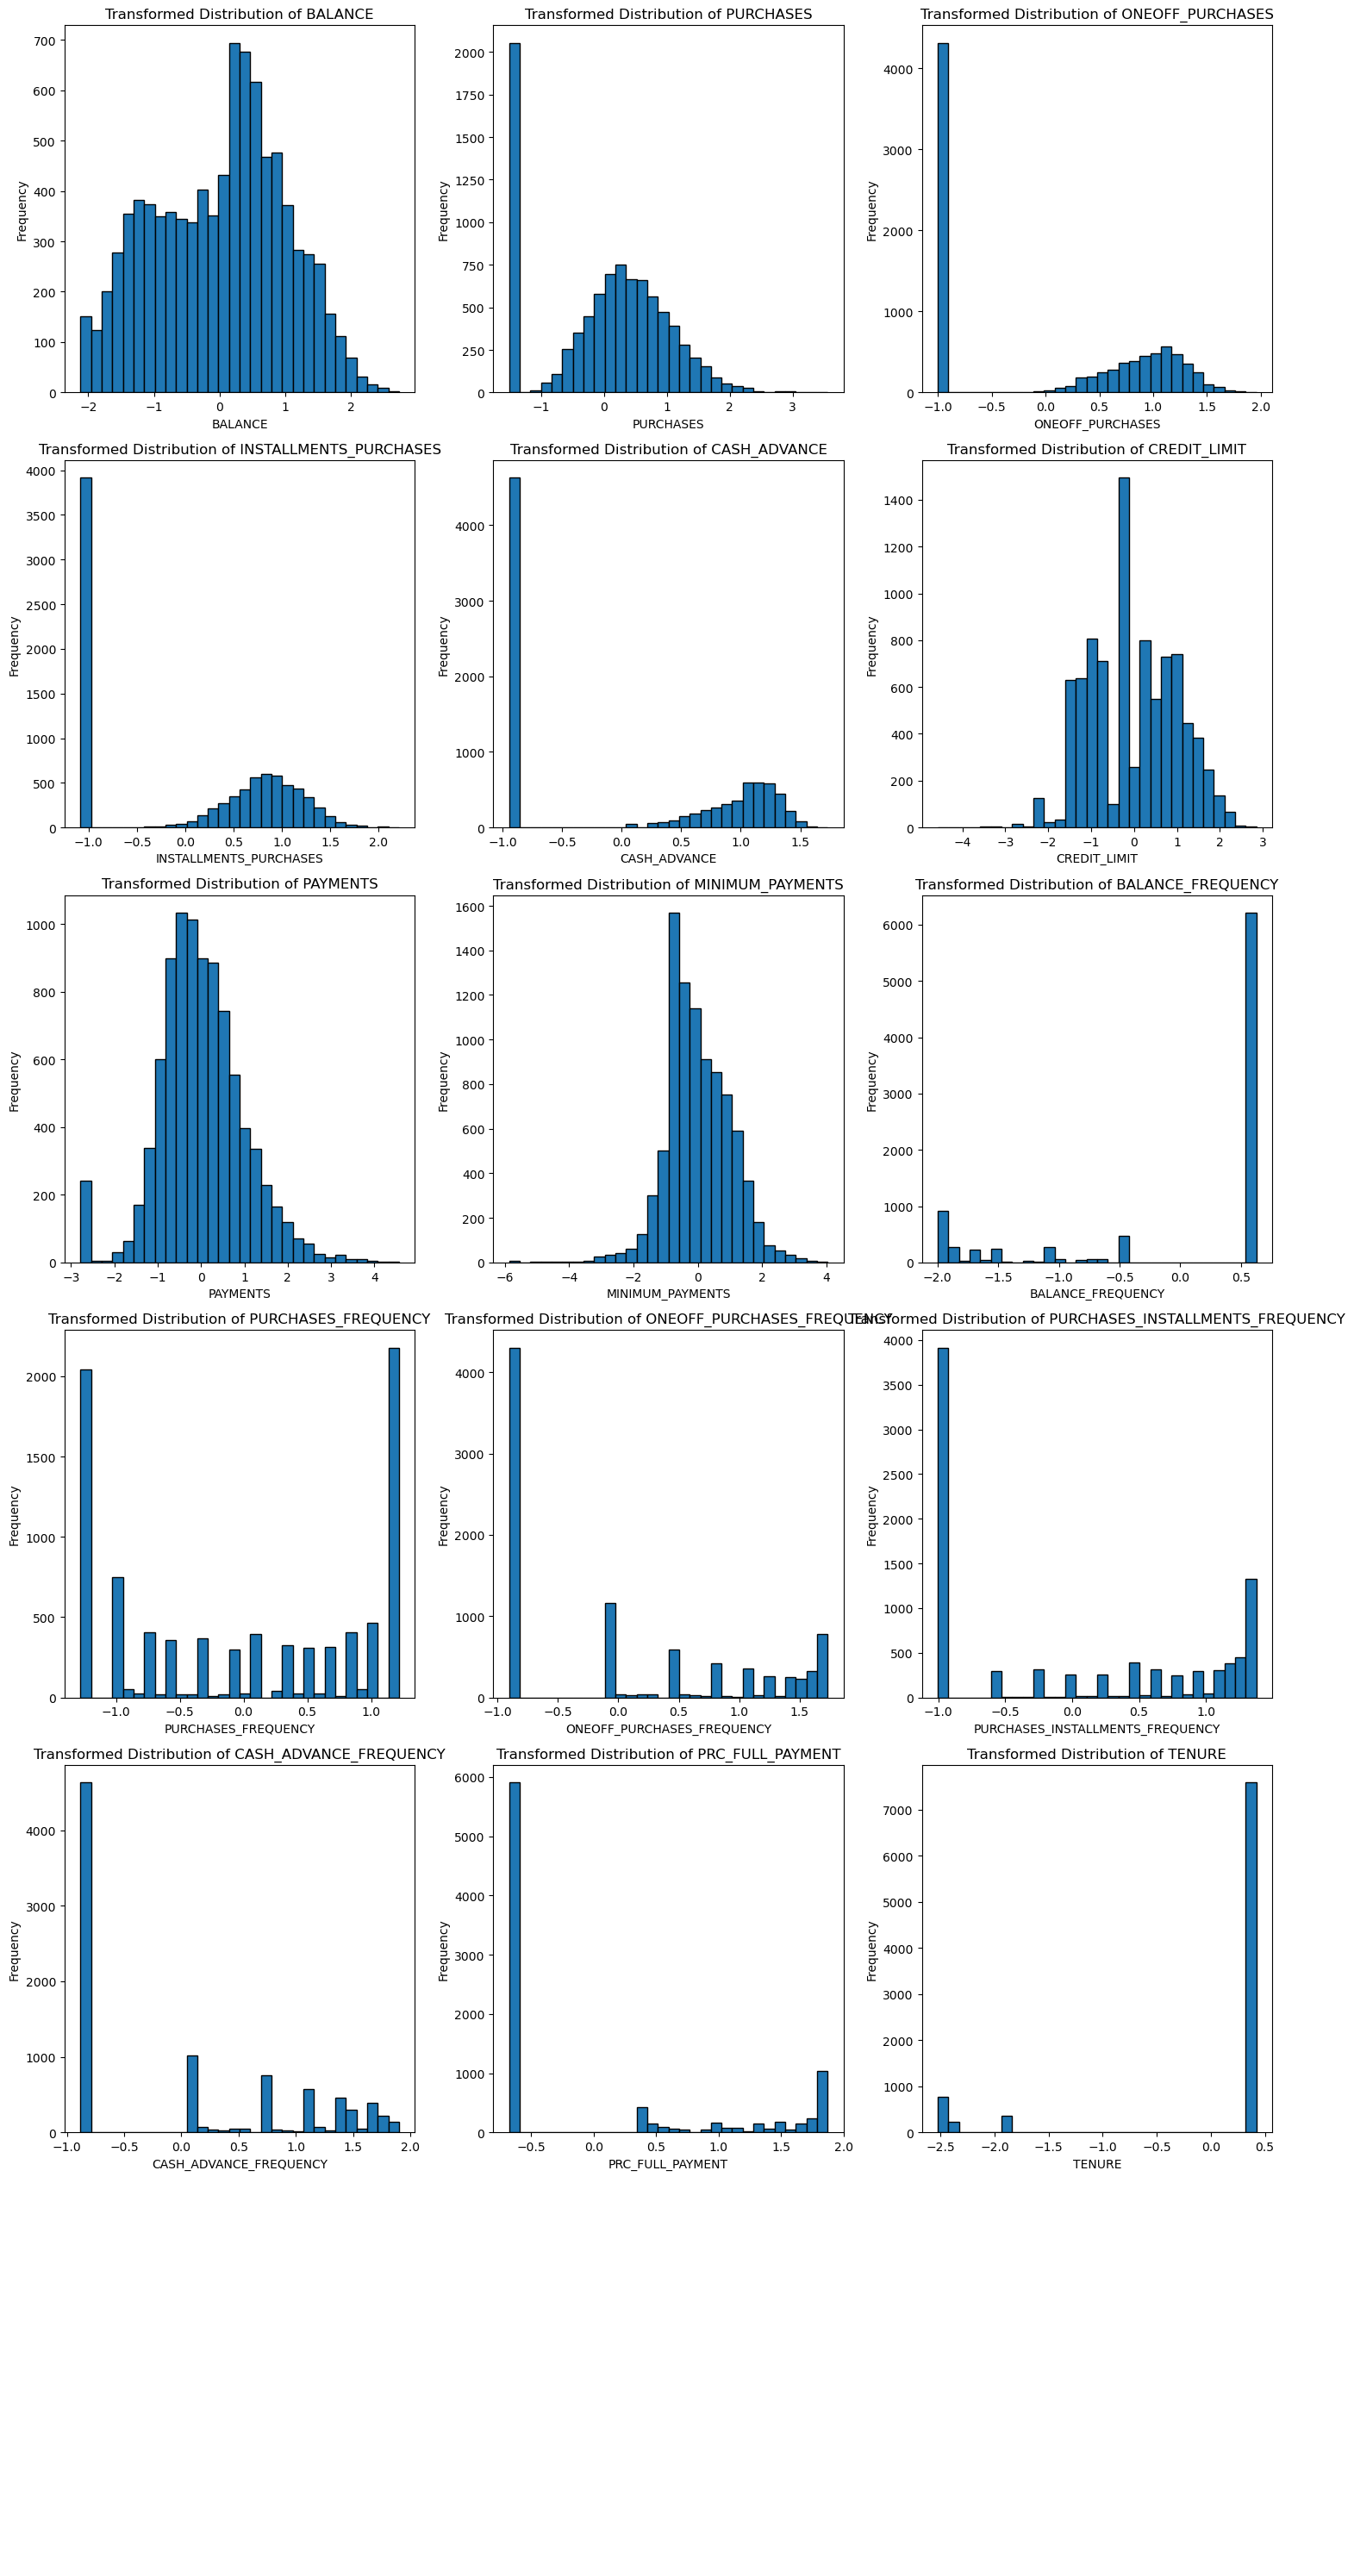

In [12]:
import matplotlib.pyplot as plt

# Set the number of rows and columns for the plot grid
num_features = len(features_to_transform)
rows = (num_features // 3) + 1  # 3 plots per row
cols = 3

# Create a grid of plots
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten()  # Flatten for easy indexing

# Plot each feature's original and transformed distributions
for idx, col in enumerate(features_to_transform):
    # Original Data
    axes[idx].hist(transformed_data[col], bins=30, edgecolor='k')
    axes[idx].set_title(f"Transformed Distribution of {col}")
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')

# Hide any empty subplots
for i in range(idx + 1, len(axes)):
    axes[i].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


In [13]:
data_imputed.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,TOTAL_PURCHASES_TYPE,CREDIT_UTILIZATION_RATIO
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0,95.40,0.095400
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0,0.00,0.000000
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0,773.17,0.103089
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,312.343947,0.000000,12.0,1499.00,0.199867
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0,16.00,0.013333


In [14]:
data_imputed['TOTAL_PURCHASES_TYPE'].skew()

8.143206562259174

In [15]:
data_imputed['CREDIT_UTILIZATION_RATIO'].skew()	

5.277187288850879

In [16]:
# Apply a box-cox transformation to reduce skewness further
from scipy.stats import boxcox

# Since boxcox requires positive data, ensure no zero or negative values exist
data_imputed['CREDIT_UTILIZATION_RATIO'] = data_imputed['CREDIT_UTILIZATION_RATIO'] + 1e-6  # Small constant to handle zeros

# Apply boxcox transformation
data_imputed['CREDIT_UTILIZATION_RATIO'], lambda_boxcox = boxcox(data_imputed['CREDIT_UTILIZATION_RATIO'])

# Check skewness again
credit_utilization_skew = data_imputed['CREDIT_UTILIZATION_RATIO'].skew()

# Display the updated skewness and box-cox lambda
credit_utilization_skew, lambda_boxcox


(-0.5197477448060513, 0.18954337246892164)

In [17]:
data_imputed.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,TOTAL_PURCHASES_TYPE,CREDIT_UTILIZATION_RATIO
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0,95.40,-1.896182
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0,0.00,-4.891218
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0,773.17,-1.846159
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,312.343947,0.000000,12.0,1499.00,-1.387609
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0,16.00,-2.948324


In [20]:
data_imputed.to_csv('Cleaned_Customer.csv')